In [5]:
import mne
import pandas as pd
import matplotlib as plt
import EntropyHub as EH
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Information of the signal

By extracting certain parameters from the signal, we can obtain relevant information such as the frequency range used for filtering, the sampling frequency, and the channels involved in the recording.

In [8]:
file = "patients_before/cropped/Subject03_1_cropped.fif"

raw = mne.io.read_raw_fif(file, preload=True)
raw_data_basal = raw.get_data()
# metadata included in the file and a list of all channels:
info = raw.info
channels = raw.ch_names
fs = raw.info['sfreq']
print(info)
print(channels)
print(fs)

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject03_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.


C:\Users\pablo\AppData\Local\Temp\ipykernel_17384\669079740.py:3: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject03_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Reading 0 ... 30999  =      0.000 ...    61.998 secs...
<Info | 10 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2010-01-01 00:00:00 UTC
 meas_id: 4 items (dict)
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>
['EEG Fp1', 'EEG Fp2', 'EEG F3', 'EEG F4', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG C3', 'EEG C4', 'EEG T5', 'EEG T6', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG A2-A1', 'ECG ECG']
500.0


# Welch periodogram Before and During arithmetic tasks

Welch’s method is applied to estimate the power spectral density (PSD) of the signals in both conditions, before and during the performance of mental arithmetic tasks, allowing a comparison of their frequency content in the O2 channel.

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject03_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject03_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_17384\2539616669.py:2: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject03_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data_before = mne.io.read_raw_fif(file_before, preload=True)


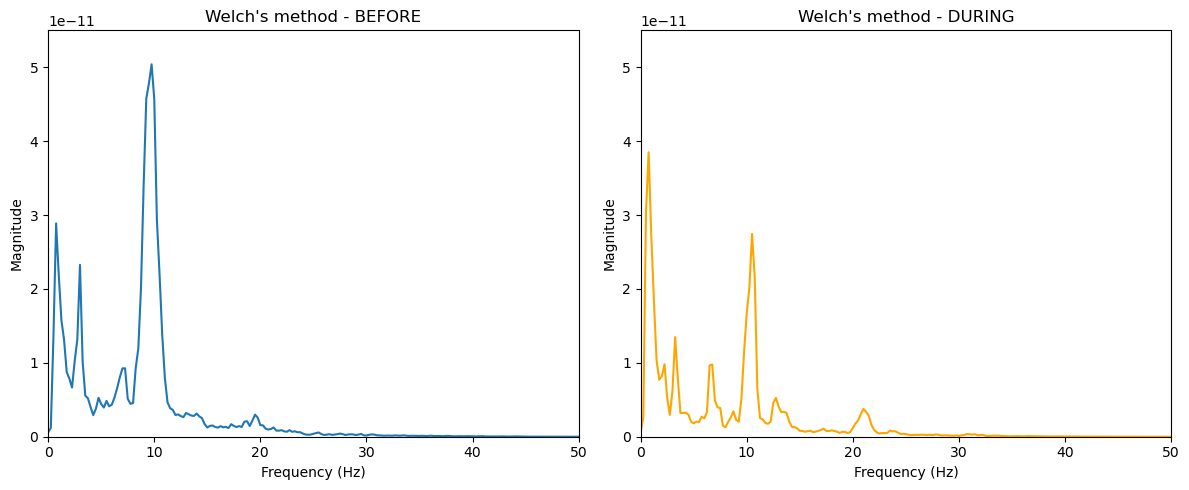

In [23]:
file_before = "subjects_before/cropped/Subject03_1_cropped.fif"
data_before = mne.io.read_raw_fif(file_before, preload=True)
raw_data_before = data_before.get_data()


file_during = "subjects_during\Subject03_2.edf"
data_during = mne.io.read_raw_edf(file_during, preload=True)
raw_data_during = data_during.get_data()


fs = data_before.info['sfreq']

win= 4*fs

# O2 signals
ch_idx = 15
ch_before = raw_data_before[ch_idx, :]
ch_during = raw_data_during[ch_idx, :]

# Welch periodogram
f_before, Pxx_before = signal.welch(ch_before, fs=fs, window='hamming', nperseg=win)
f_during, Pxx_during = signal.welch(ch_during, fs=fs, window='hamming', nperseg=win)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(f_before, Pxx_before)
plt.title("Welch's method - BEFORE")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 50)
plt.ylim(0, 5.5e-11)

plt.subplot(1, 2, 2)
plt.plot(f_during, Pxx_during, color='orange')
plt.title("Welch's method - DURING")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 50)
plt.ylim(0, 5.5e-11)

plt.tight_layout()
plt.savefig("welch_comparison_subject03_O2.png", dpi=300) 
plt.show()


# Definition of the function to calculate Relative Power

In [9]:
import numpy as np
from scipy import signal
from scipy.integrate import simpson

win= 4*fs

# Definition of frequency bands
frequency_bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 50)
}

# Function to calculate the power in each band
def calculate_power_per_band(ch, fs, frequency_bands):
    f_welch_eeg, Px_welch_eeg = signal.welch(ch, fs=fs, window='hamming', nperseg=win)
    
    idx_total = np.logical_and(f_welch_eeg >= 0.5, f_welch_eeg <= 50)
    total_power = simpson(Px_welch_eeg[idx_total],f_welch_eeg[idx_total])

    # Relative power per band
    relative_power = {}
    
    for band, (f_low, f_high) in frequency_bands.items():
        idx = np.logical_and(f_welch_eeg >= f_low, f_welch_eeg <= f_high)
        power_band = simpson(y=Px_welch_eeg[idx], x=f_welch_eeg[idx])
        relative_power[band] = (power_band / total_power) * 100
       
    return relative_power

# Apply the calculation to all EEG channels
def compare_power_eeg(raw_data, fs, frequency_bands):
    num_channels = raw_data.shape[0]
    powers_all_channels = []

    for channel in range(num_channels):
        ch_data = raw_data[channel, :]  
        powers_per_band = calculate_power_per_band(ch_data, fs, frequency_bands)
        powers_all_channels.append(powers_per_band)

    return powers_all_channels

# Load of data Before and During arithmetic tasks

In [12]:
import mne
import glob
import os

path_before = "subjects_before/cropped"
path_during = "subjects_during"


# Data list for all patients
patients_during = []
for file in glob.glob(os.path.join(path_during, "*.edf")):
    data = mne.io.read_raw_edf(file, preload=True)
    patients_during.append(data.get_data())

# We put our data into two different dictionaries depending on when the tasks are performed
powers_before = {}
powers_during = {}

# Before
for patient_idx, file_cut in enumerate(glob.glob(path_before + r"\*.fif")):
    raw_data = mne.io.read_raw_fif(file_cut, preload=True)
    powers_before[patient_idx] = compare_power_eeg(raw_data.get_data(), fs, frequency_bands)

# During
for patient_idx, file_edf in enumerate(patients_during):
    powers_during[patient_idx] = compare_power_eeg(file_edf, fs, frequency_bands)


Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject02_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting

C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject00_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\2499055769.py:21: DeprecationWarning: You are passing x=[ 0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25
  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75  6.    6.25
  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25
  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75 12.   12.25
 12.5  12.75 13.   13.25 13.5  13.75 14.  

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject02_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject03_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject02_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject03_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject04_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject05_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject04_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject05_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject06_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject07_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject06_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject07_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject08_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject09_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject08_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject09_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject10_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject11_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject10_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject11_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject12_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject13_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject12_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject13_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject14_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject15_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject14_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject15_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject16_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject17_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject16_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject17_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject18_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject19_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject18_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject19_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject20_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject21_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject20_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject21_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject22_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject23_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject22_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject23_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject24_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject25_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject24_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject25_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject26_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject27_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject26_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject27_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject28_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject29_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject28_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject29_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject30_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject31_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject30_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject31_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject32_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject33_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject32_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject33_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject34_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject35_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject34_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_cut, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_22596\4290903942.py:21: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject35_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif

# Calculation of Power in each channel

In [14]:
import pandas as pd

# Empty list to store all records
list_before1 = []
list_during1 = []

# Convert powers_before to a list of dictionaries
for patient_idx, channels in powers_before.items():
    for channel_idx, bands in enumerate(channels):
        for band, power in bands.items():
            list_before1.append({
                'Patient': patient_idx + 1,      
                'Channel': f'Channel_{channel_idx + 1}', 
                'Band': band,                    
                'Power Before': power,              
            })

# Convert powers_during to a list of dictionaries
for patient_idx, channels in powers_during.items():
    for channel_idx, bands in enumerate(channels):
        for band, power in bands.items():
            list_during1.append({
                'Patient': patient_idx + 1,      
                'Channel': f'Channel_{channel_idx + 1}', 
                'Band': band,                    
                'Power During': power,       
                })


# Convert to DataFrame 
before_df1 = pd.DataFrame(list_before1)
during_df1 = pd.DataFrame(list_during1)

# Join including all rows from both DataFrames
result_df = pd.merge(before_df1, during_df1, on=['Patient', 'Channel', 'Band'], how='outer')
print(result_df)


      Patient    Channel   Band  Power Before  Power During
0           1  Channel_1  alpha     41.600519     16.895425
1           1  Channel_1   beta     12.374015      7.969808
2           1  Channel_1  delta     33.707031     67.102911
3           1  Channel_1  gamma      1.305227      1.162707
4           1  Channel_1  theta     11.013208      6.869148
...       ...        ...    ...           ...           ...
3775       36  Channel_9  alpha      9.190977      9.287514
3776       36  Channel_9   beta     10.470804     11.554875
3777       36  Channel_9  delta     62.875479     54.783884
3778       36  Channel_9  gamma      1.837851      3.590490
3779       36  Channel_9  theta     15.624889     20.783237

[3780 rows x 5 columns]


### Channels

The numerical channel identifiers in the Channel column of the DataFrame are replaced with their corresponding EEG channel names.

In [18]:
channels_names = {
    0: 'Fp1', 1: 'Fp2', 2: 'F3', 3: 'F4', 4: 'F7', 5: 'F8', 6: 'T3', 7: 'T4', 8: 'C3', 9:'C4', 
    10:'T5', 11:'T6', 12:'P3', 13:'P4', 14:'O1', 15:'O2', 16:'Fz', 17:'Cz', 18:'Pz', 19:'A1-A2', 20:'ECG'
}

# Replace the values ​​of the "Channel" column in result_df using the dictionary
result_df['Channel'] = result_df['Channel'].apply(lambda x: channels_names[int(x.split('_')[1]) - 1])
print(result_df)

      Patient Channel   Band  Power Before  Power During
0           1     Fp1  alpha     41.600519     16.895425
1           1     Fp1   beta     12.374015      7.969808
2           1     Fp1  delta     33.707031     67.102911
3           1     Fp1  gamma      1.305227      1.162707
4           1     Fp1  theta     11.013208      6.869148
...       ...     ...    ...           ...           ...
3775       36      C3  alpha      9.190977      9.287514
3776       36      C3   beta     10.470804     11.554875
3777       36      C3  delta     62.875479     54.783884
3778       36      C3  gamma      1.837851      3.590490
3779       36      C3  theta     15.624889     20.783237

[3780 rows x 5 columns]


# Comparison of power before and during in each channel

In this case we select the patient whose comparison we want to see.

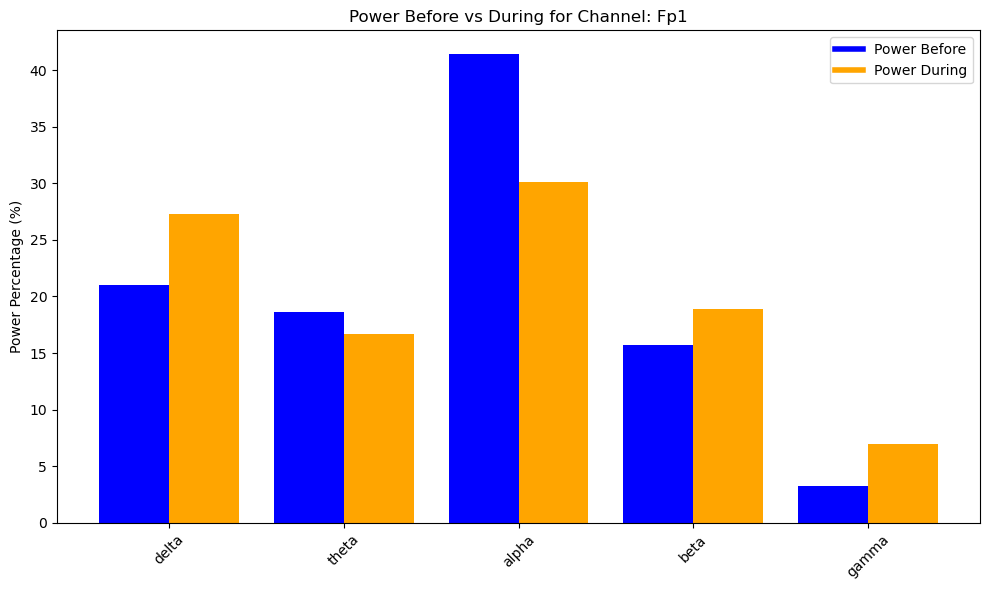

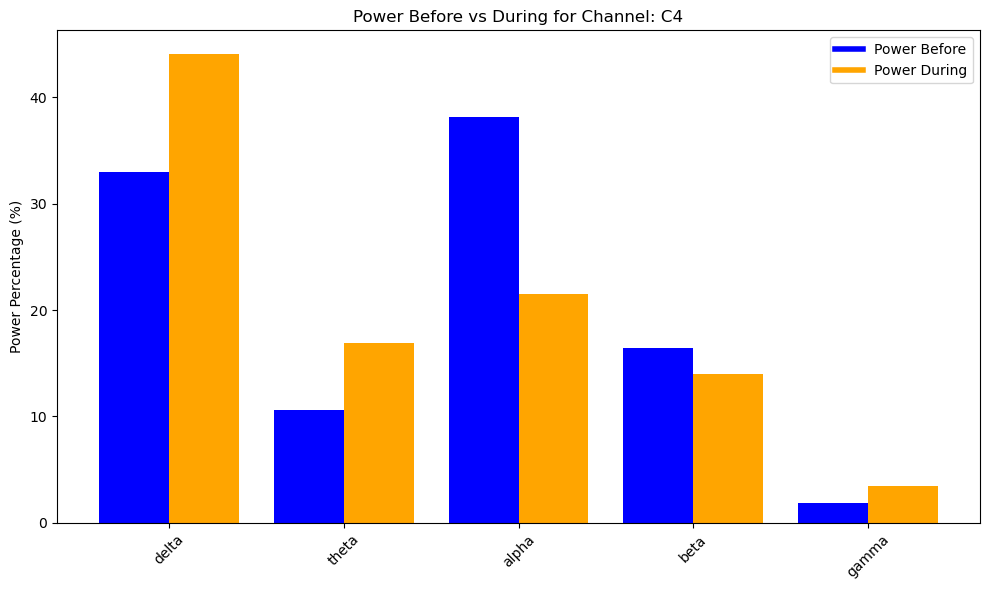

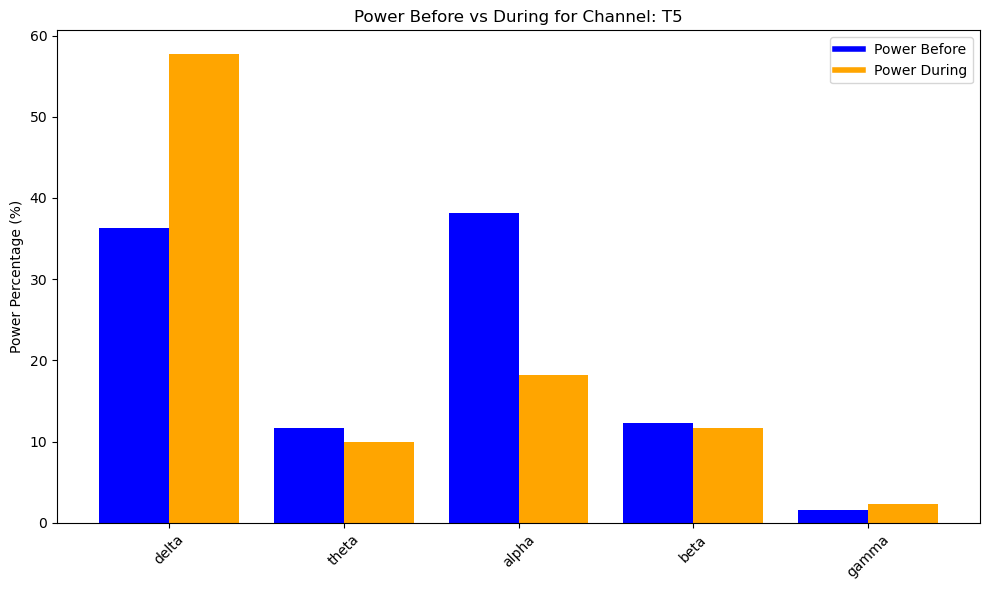

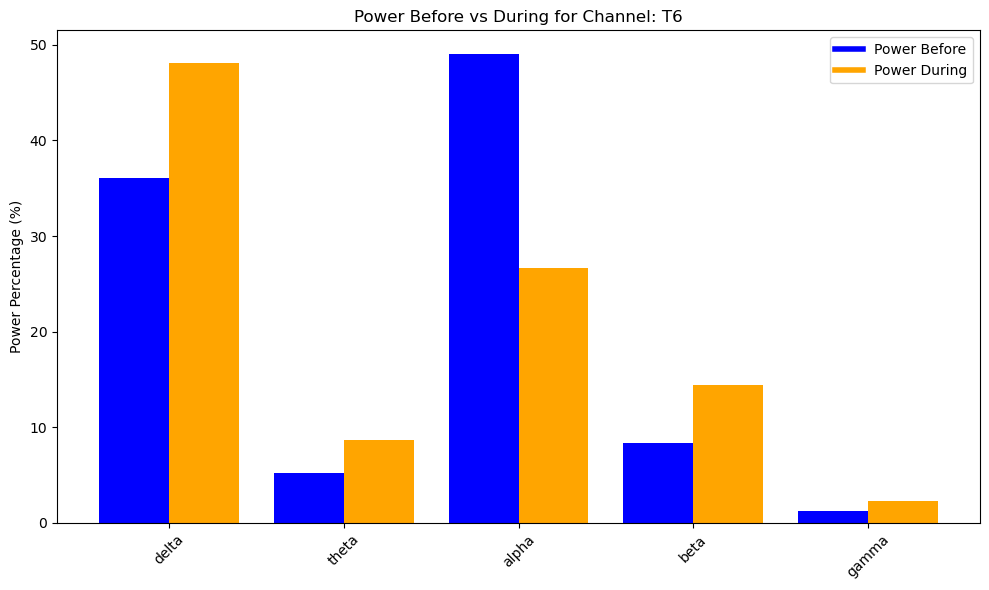

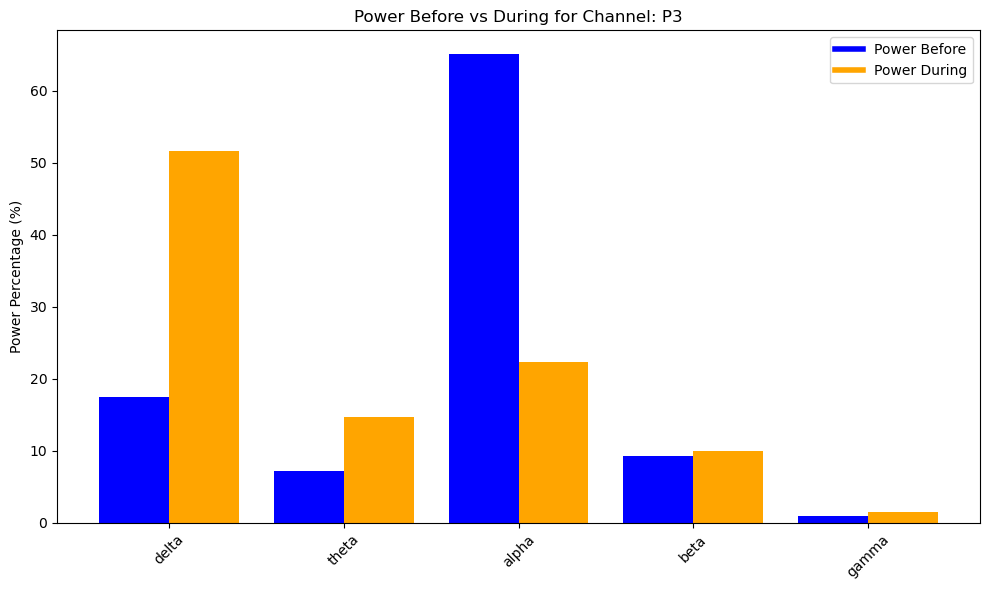

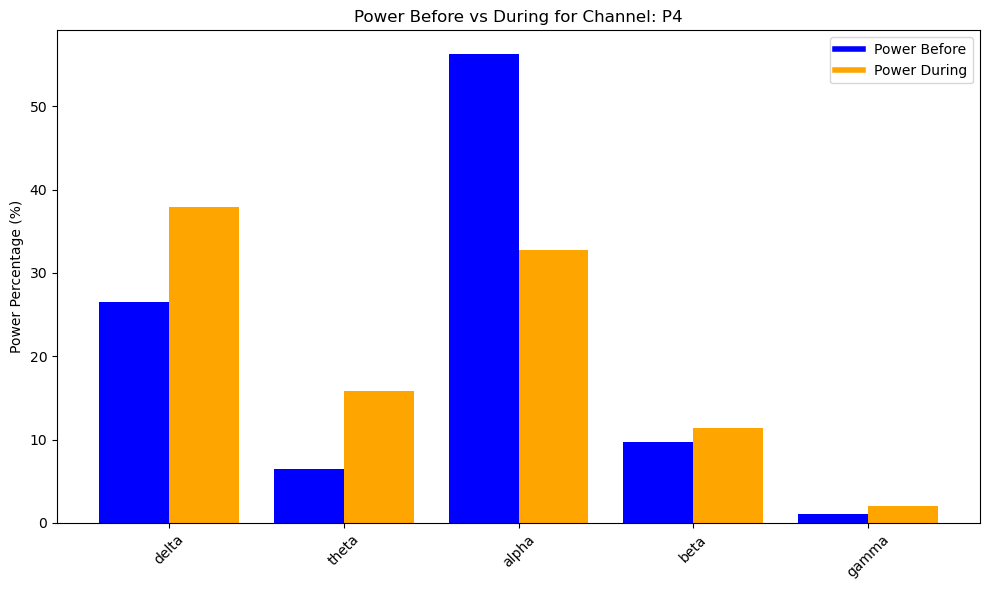

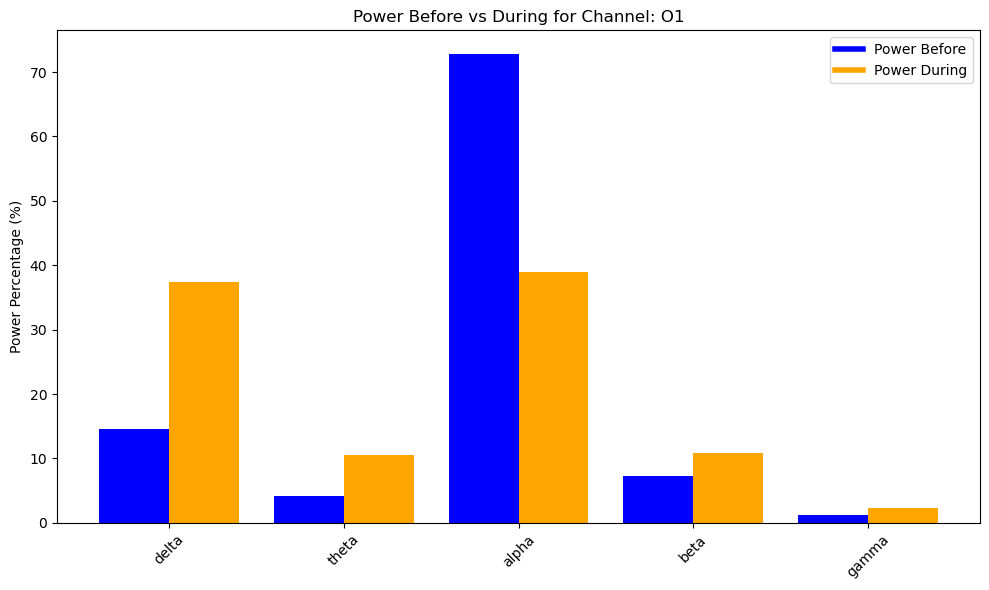

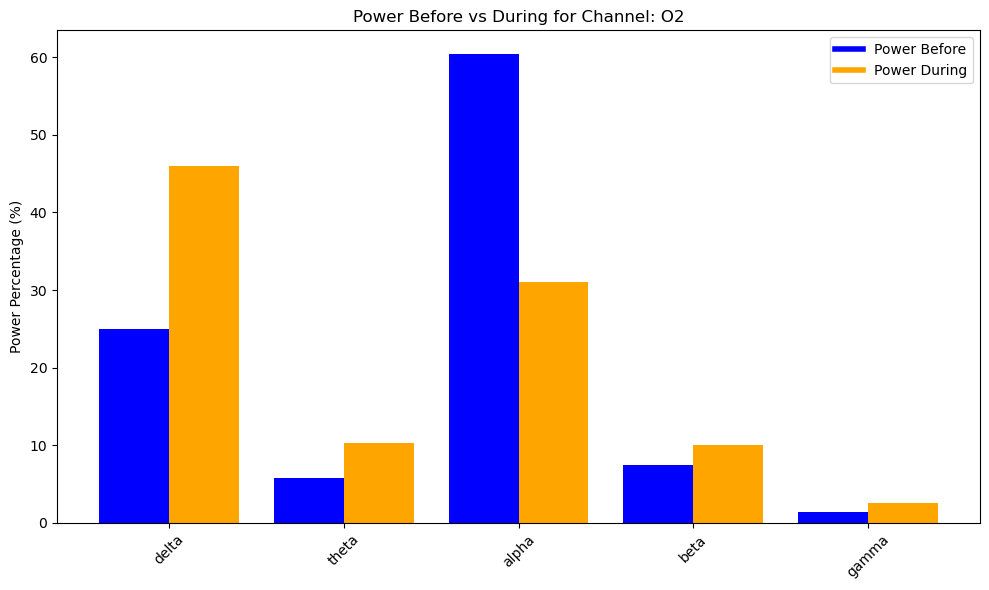

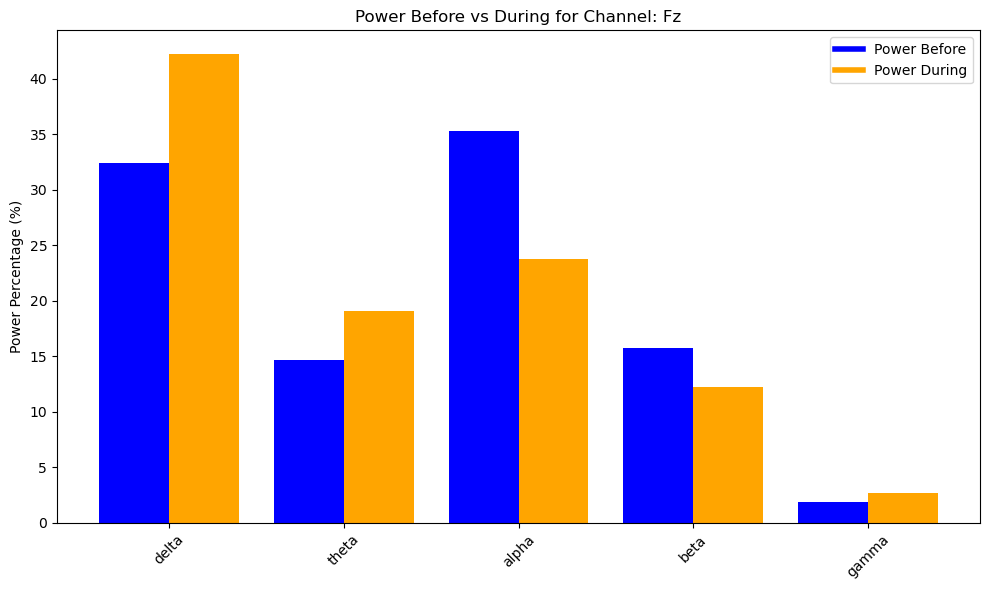

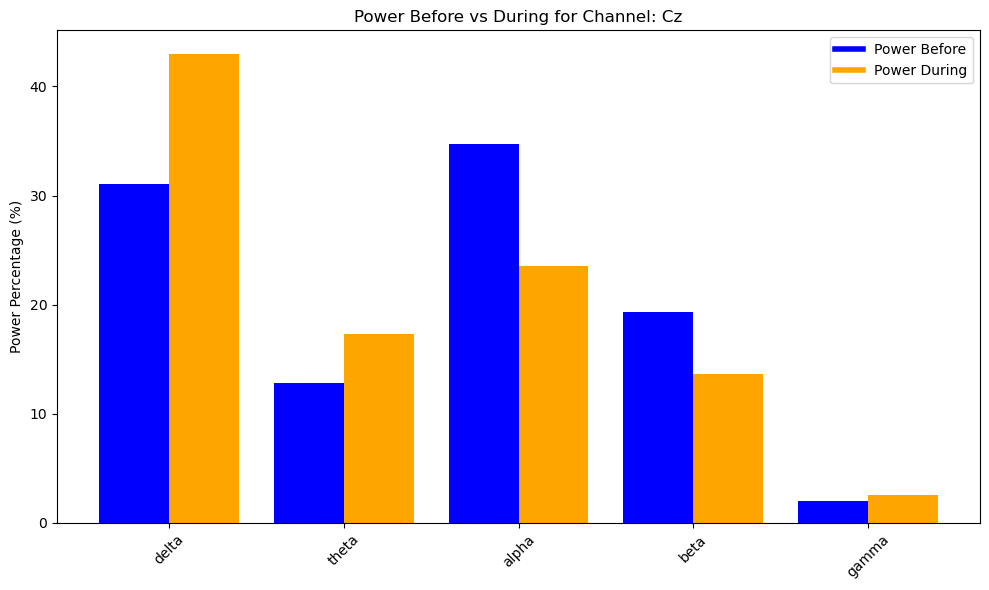

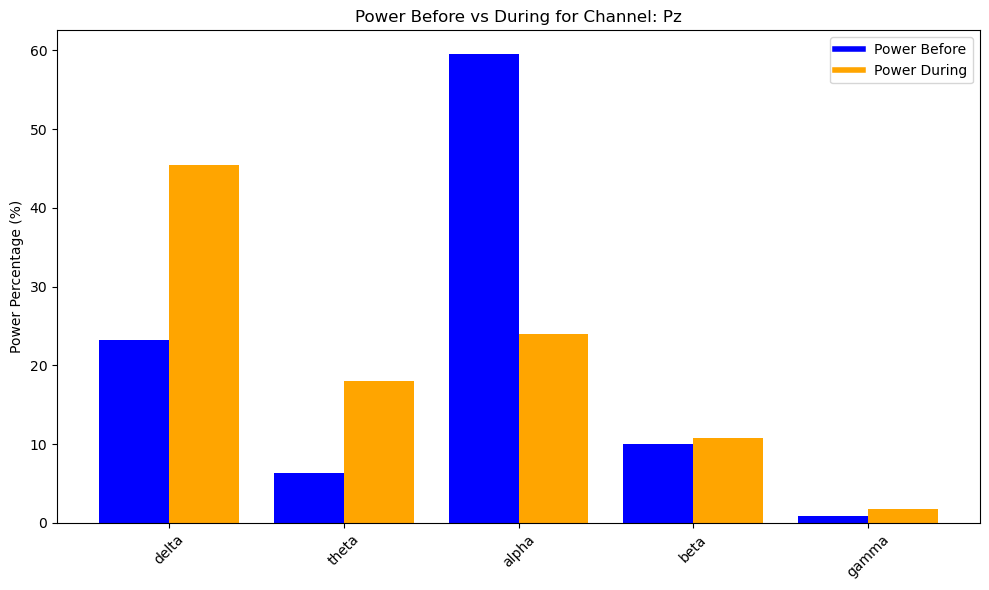

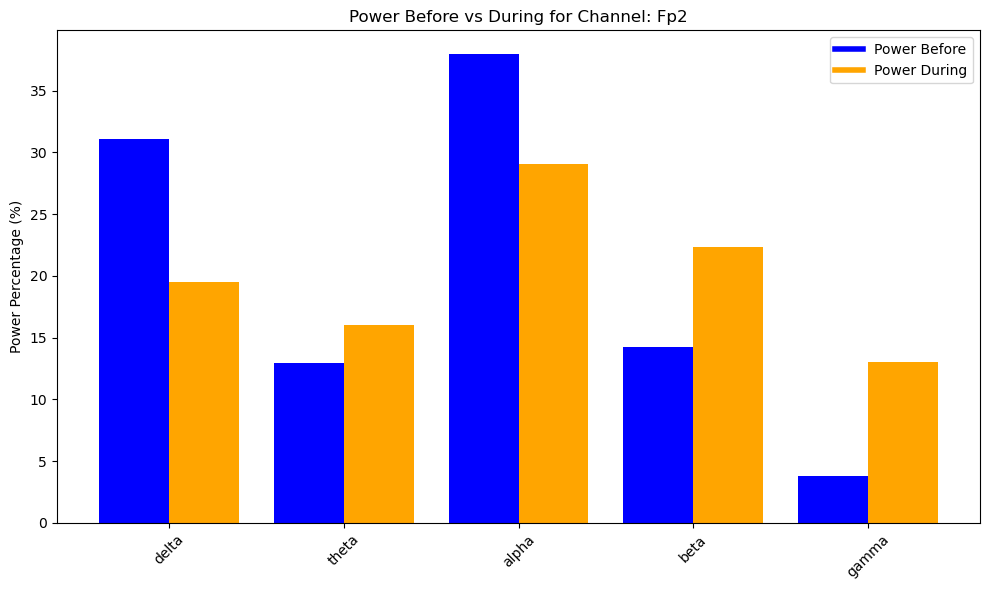

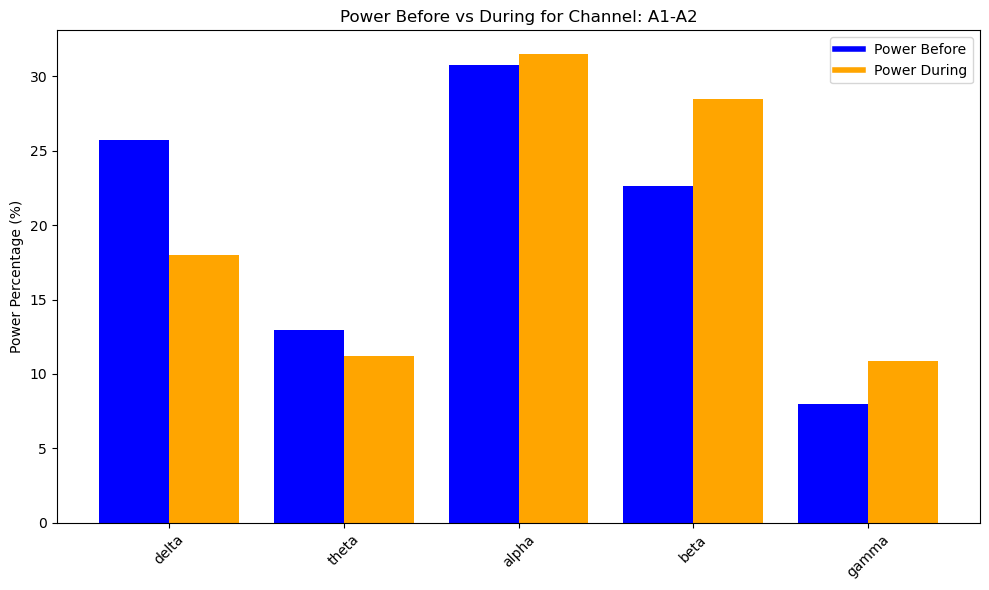

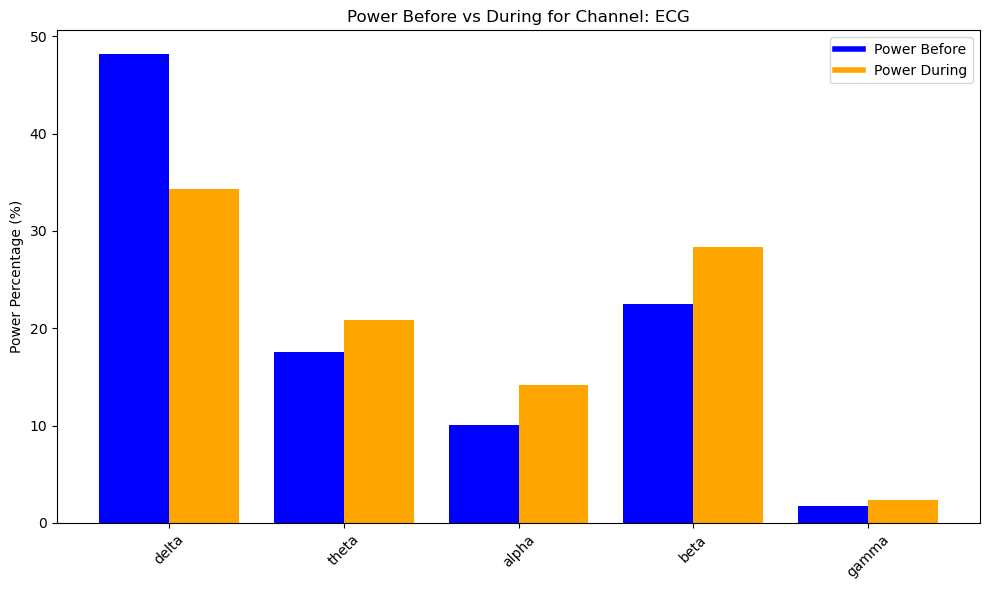

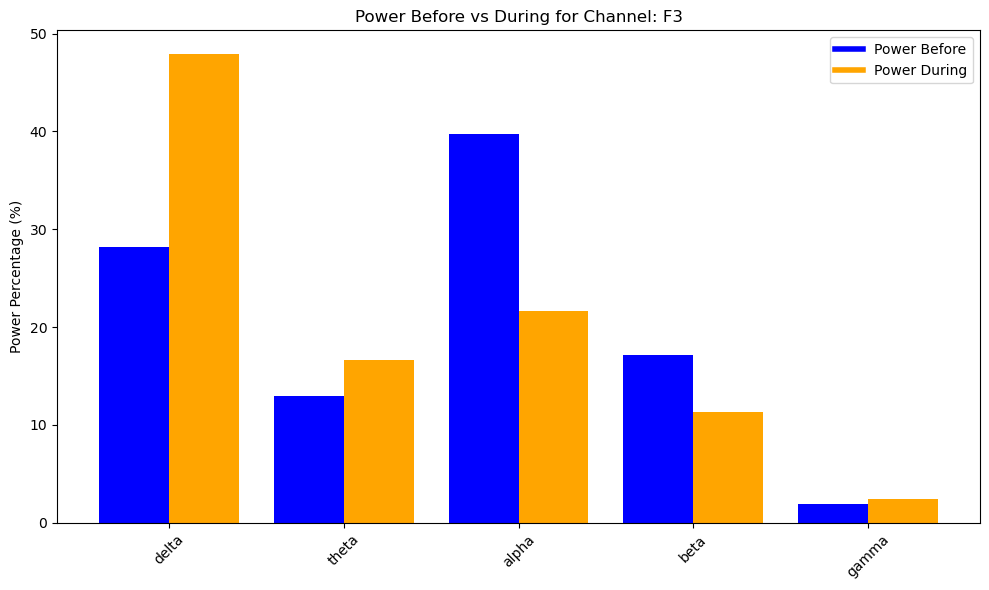

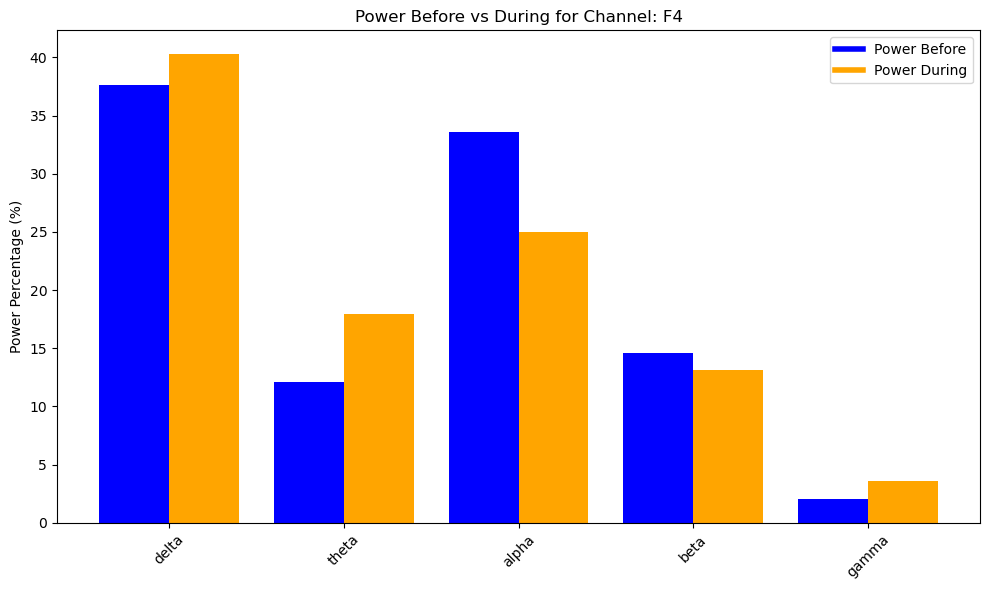

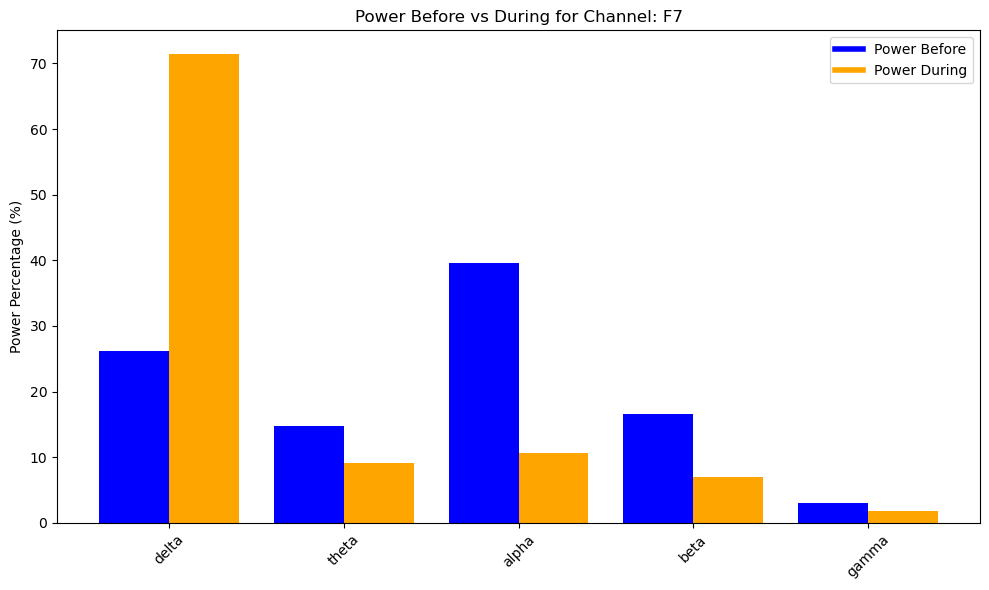

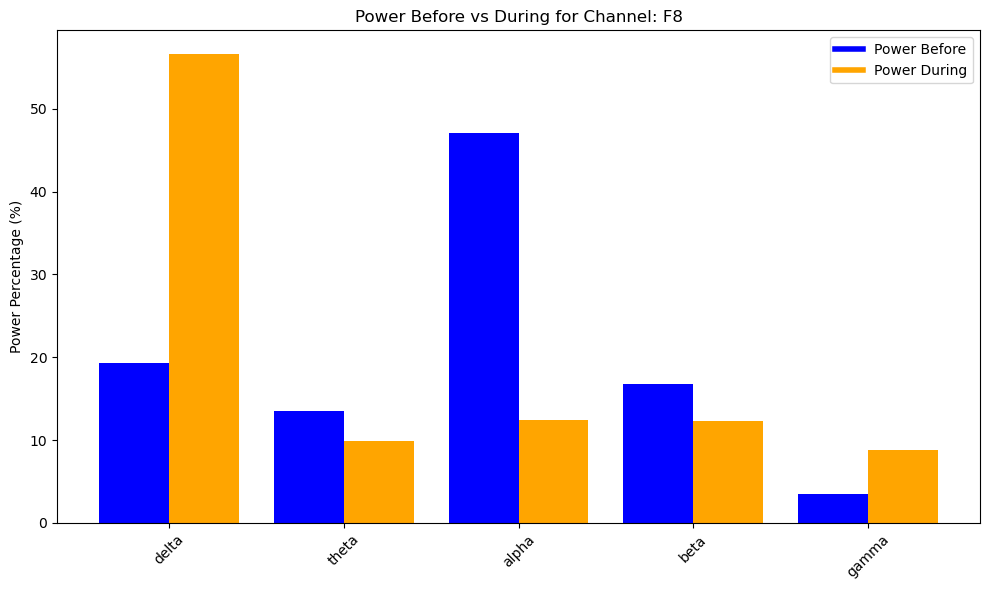

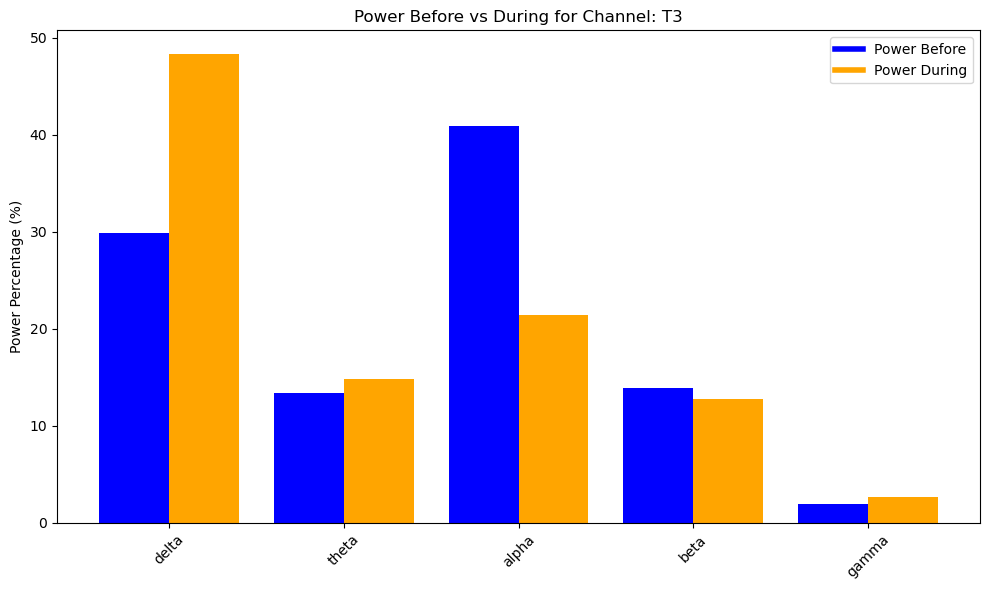

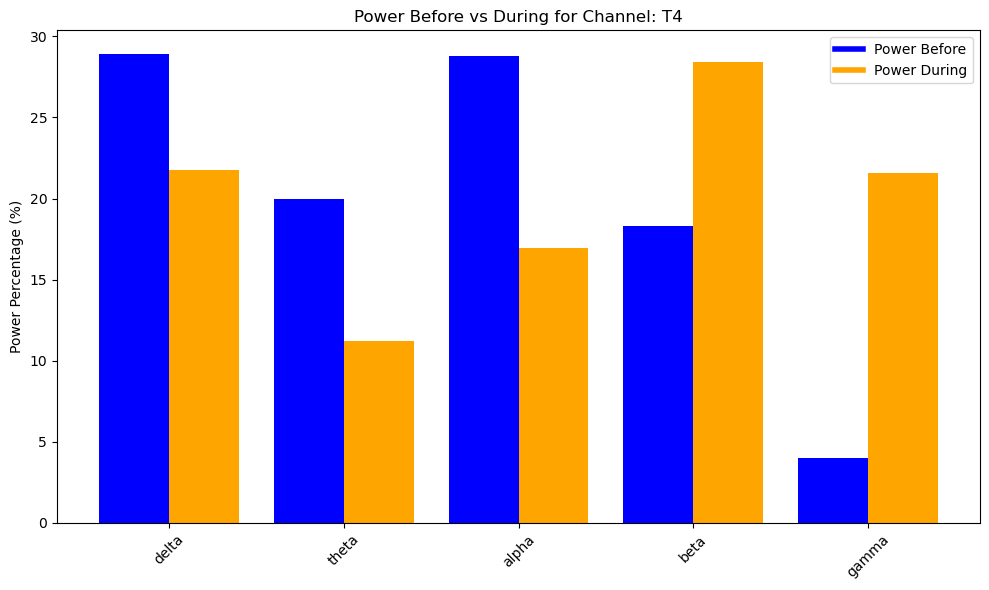

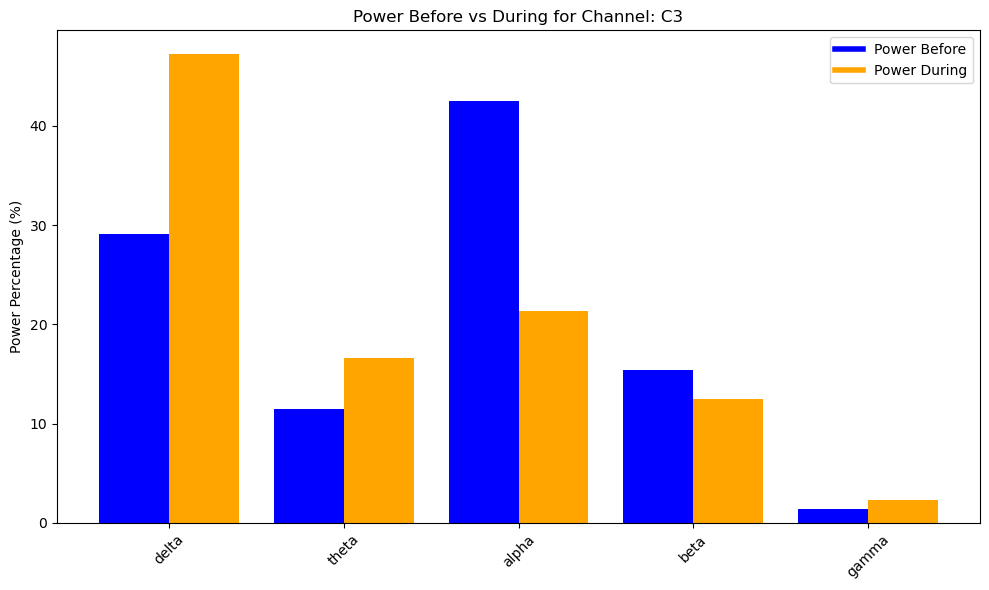

In [35]:
import matplotlib.pyplot as plt

# Select the patient we want to see the comparison 
result_df_patient1 = result_df[result_df['Patient'] == 20]

# Channels
channels = result_df_patient1['Channel'].unique()

# Create bar charts for each channel
for ch in channels:
    
    df_channel = result_df_patient1[result_df_patient1['Channel'] == ch]
    plt.figure(figsize=(10, 6))

    # Define the order of the bands
    band_order = ['delta', 'theta', 'alpha', 'beta', 'gamma']
    
        
    # For each band, power before and during
    for i, band in enumerate(band_order):
        
        df_band = df_channel[df_channel['Band'] == band]
        
        plt.bar(i - 0.2, df_band['Power Before'].values[0], width=0.4, label='Power Before', align='center', color = 'blue') # Before
        plt.bar(i + 0.2, df_band['Power During'].values[0], width=0.4, label='Power During', align='center', color = 'orange') # During
    
    plt.xticks(range(len(band_order)), band_order, rotation=45)
    plt.ylabel('Power Percentage (%)')
    plt.title(f'Power Before vs During for Channel: {ch}')
    
    # Adjust legend
    handles = [plt.Line2D([0], [0], color='blue', lw=4),  
               plt.Line2D([0], [0], color='orange', lw=4)]  
    labels = ['Power Before', 'Power During']
    plt.legend(handles=handles, labels=labels)
    
    plt.tight_layout()
    plt.show()

### Just O2 channel

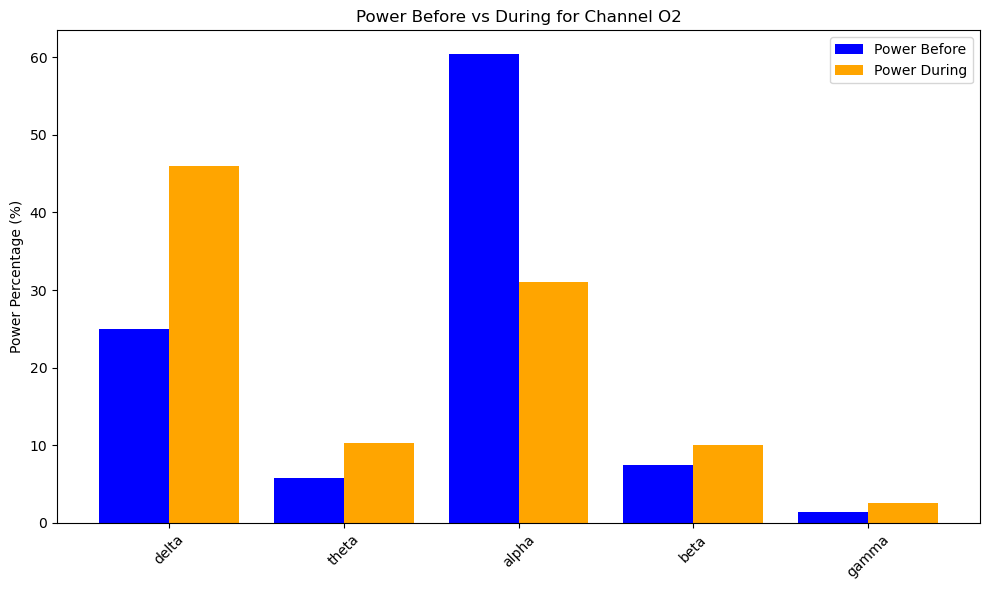

In [39]:
import matplotlib.pyplot as plt

# Select the patient we want to see the comparison 
result_df_patient1 = result_df[result_df['Patient'] == 20]

# Filter specific channel
df_channel = result_df_patient1[result_df_patient1['Channel'] == 'O2']

# Define the order of the bands
band_order = ['delta', 'theta', 'alpha', 'beta', 'gamma']

plt.figure(figsize=(10, 6))

# For each band, power before and during
for i, band in enumerate(band_order):
    df_band = df_channel[df_channel['Band'] == band]
    if not df_band.empty:
        plt.bar(i - 0.2, df_band['Power Before'].values[0], width=0.4, label='Power Before' if i == 0 else "", color='blue')
        plt.bar(i + 0.2, df_band['Power During'].values[0], width=0.4, label='Power During' if i == 0 else "", color='orange')

plt.xticks(range(len(band_order)), band_order, rotation=45)
plt.ylabel('Power Percentage (%)')
plt.title(f'Power Before vs During for Channel O2')

# Adjust legend
plt.legend()
plt.tight_layout()
plt.savefig("comparison_power_20.png", dpi=300)  # Save figure
plt.show()


# Power Before and Power During in O2 channel

In [26]:
import pandas as pd

# Empty list to store all records
list_before = []
list_during = []


# Convert powers_before to a list of dictionaries
for patient_idx, channels in powers_before.items():
    for band, power in channels[15].items():          # The 15th position in the channel list corresponds to O2 channel
        list_before.append({
            'Patient': patient_idx + 1,
            'Channel': f'EEG O2',
            'Band': band,
            'Power Before': power,
        })

# Convert powers_during to a list of dictionaries
for patient_idx, channels in powers_during.items():
    for band, power in channels[15].items():          # The 15th position in the channel list corresponds to O2 channel
        list_during.append({
            'Patient': patient_idx + 1,
            'Channel': f'EEG O2',
            'Band': band,
            'Power During': power,
        })

# Convert to DataFrame 
before_df = pd.DataFrame(list_before)
during_df = pd.DataFrame(list_during)

### We save the results in CSV files for future comparisons

In [86]:
# Save before_df and during_df as CSV files

before_df.to_csv('power_O2_before.csv', index=False)
during_df.to_csv('power_O2_during.csv', index=False)

# Histograms and Shapiro-Wilk test

## Power Before

The data follow a normal distribution: 0.1097067440482084


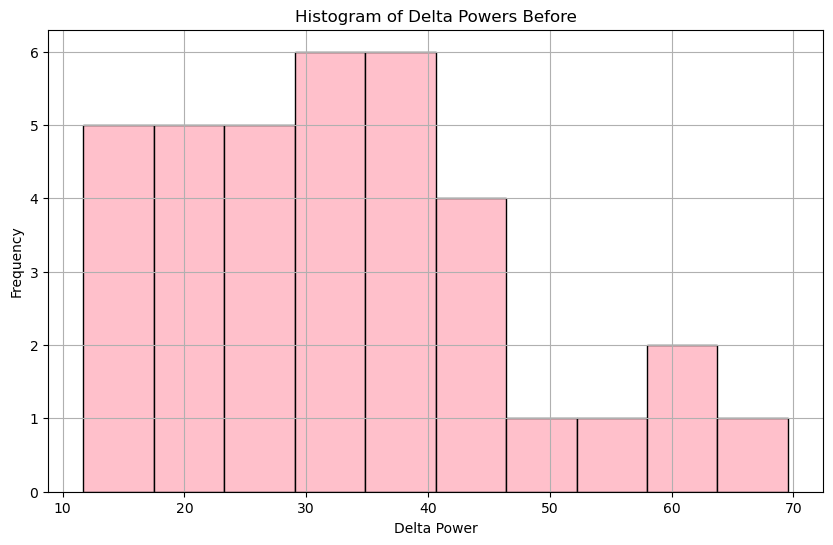

In [28]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro


delta_df = before_df[before_df['Band'] == 'delta']

# Extract the power before for the delta band
power_delta1 = delta_df['Power Before']

# Shapiro-Wilk test
stat, p = shapiro(power_delta1)
if p>0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)
    
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_delta1, bins=10, color='pink', edgecolor='black')  
plt.title('Histogram of Delta Powers Before')
plt.xlabel('Delta Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The data follow a normal distribution: 0.08260894653332786


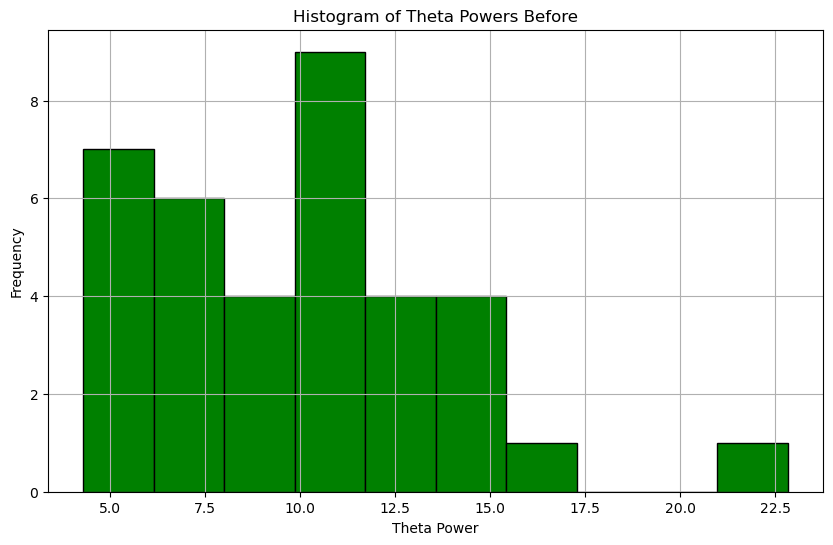

In [30]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

theta_df = before_df[before_df['Band'] == 'theta']

# Extract the power before for the theta band
power_theta1 = theta_df['Power Before']

# Shapiro-Wilk test
stat, p = shapiro(power_theta1)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)
    
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_theta1, bins=10, color='green', edgecolor='black')  
plt.title('Histogram of Theta Powers Before')
plt.xlabel('Theta Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The data follow a normal distribution: 0.6188534121722584


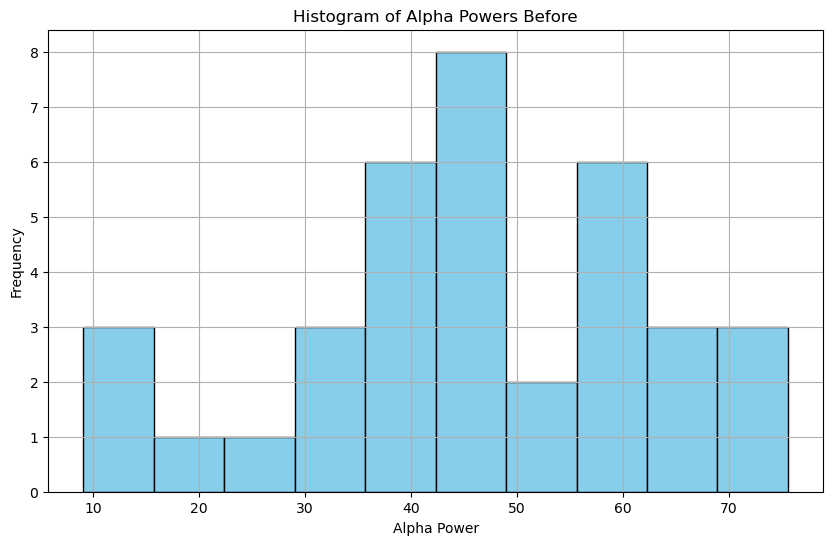

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

alpha_df = before_df[before_df['Band'] == 'alpha']

# Extract the power before for the alpha band
power_alpha1 = alpha_df['Power Before']

# Shapiro-Wilk test
stat, p = shapiro(power_alpha1)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)
    
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_alpha1, bins=10, color='skyblue', edgecolor='black')  
plt.title('Histogram of Alpha Powers Before')
plt.xlabel('Alpha Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The data do NOT follow a normal distribution: 0.030025396915120753


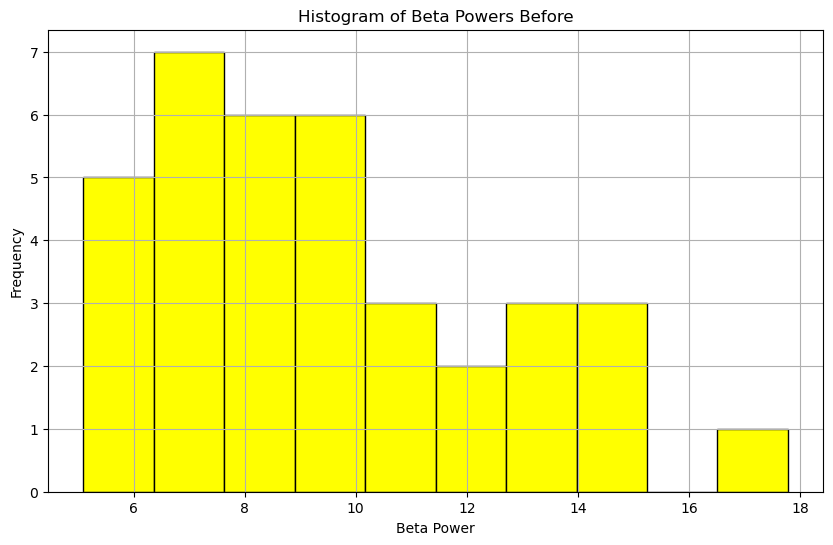

In [34]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

beta_df = before_df[before_df['Band'] == 'beta']

# Extract the power before for the beta band
power_beta1 = beta_df['Power Before']

# Shapiro-Wilk test
stat, p = shapiro(power_beta1)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)
    
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_beta1, bins=10, color='yellow', edgecolor='black')  
plt.title('Histogram of Beta Powers Before')
plt.xlabel('Beta Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The data do NOT follow a normal distribution: 1.7798622824801447e-06


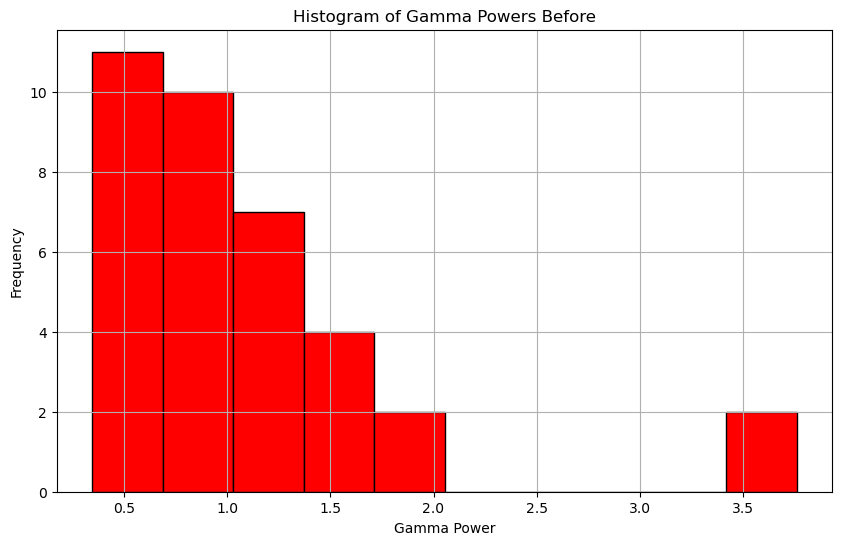

In [36]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

gamma_df = before_df[before_df['Band'] == 'gamma']

# Extract the power before for the gamma band
power_gamma1 = gamma_df['Power Before']

# Shapiro-Wilk test
stat, p = shapiro(power_gamma1)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)
    
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_gamma1, bins=10, color='red', edgecolor='black')  
plt.title('Histogram of Gamma Powers Before')
plt.xlabel('Gamma Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Power During

The data follow a normal distribution: 0.315814249760767


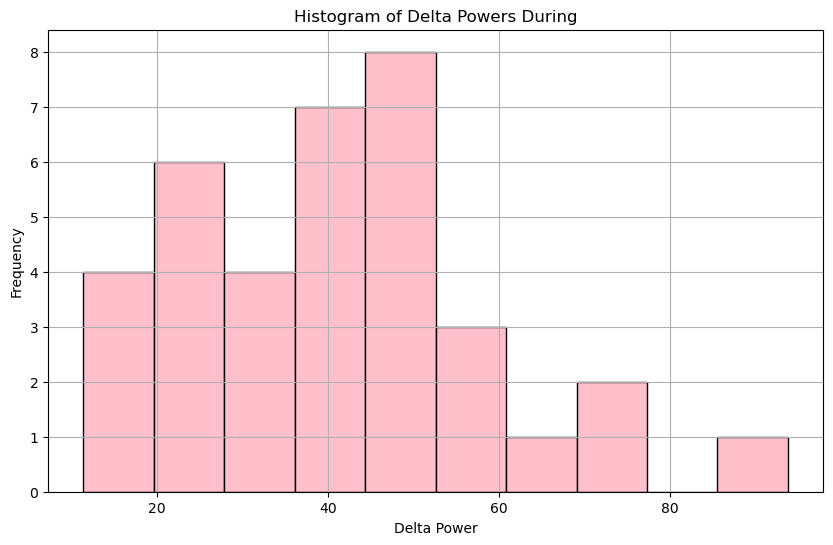

In [39]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

delta_df = during_df[during_df['Band'] == 'delta']

# Extract the power during for the delta band
power_delta2 = delta_df['Power During']

# Shapiro-Wilk test
stat, p = shapiro(power_delta2)
if p>0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)
    

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_delta2, bins=10, color='pink', edgecolor='black')  
plt.title('Histogram of Delta Powers During')
plt.xlabel('Delta Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The data follow a normal distribution: 0.4778043325401975


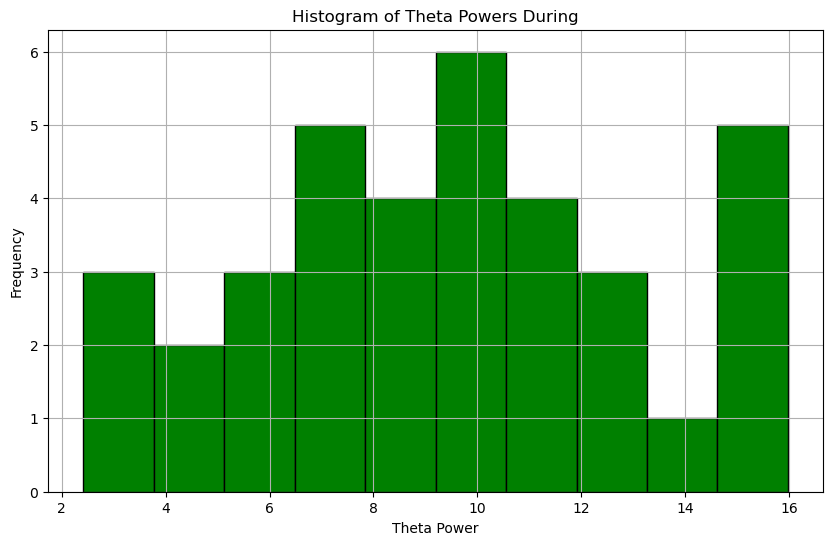

In [41]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

theta_df = during_df[during_df['Band'] == 'theta']

# Extract the power during for the theta band
power_theta2 = theta_df['Power During']

# Shapiro-Wilk test
stat, p = shapiro(power_theta2)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_theta2, bins=10, color='green', edgecolor='black')  
plt.title('Histogram of Theta Powers During')
plt.xlabel('Theta Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The data follow a normal distribution: 0.17544309754918147


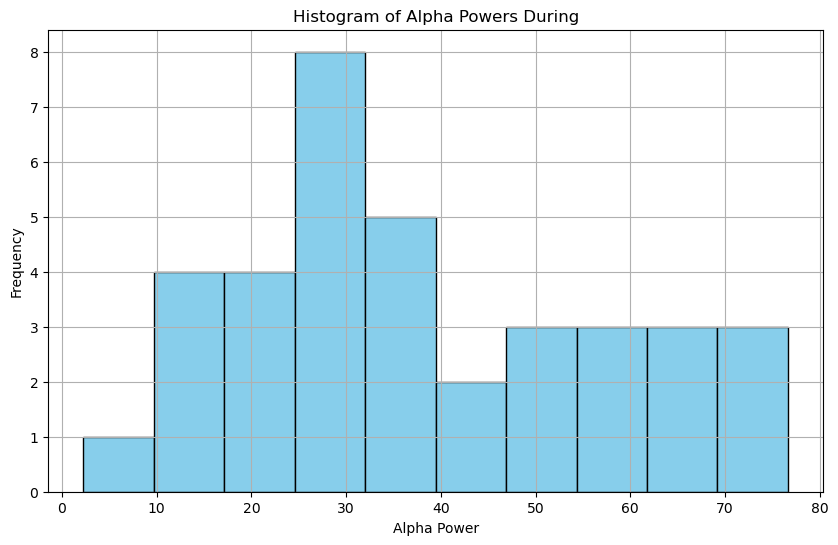

In [43]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

alpha_df = during_df[during_df['Band'] == 'alpha']

# Extract the power during for the alpha band
power_alpha2 = alpha_df['Power During']

# Shapiro-Wilk test
stat, p = shapiro(power_alpha2)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_alpha2, bins=10, color='skyblue', edgecolor='black')  
plt.title('Histogram of Alpha Powers During')
plt.xlabel('Alpha Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The data follow a normal distribution: 0.11594804732668534


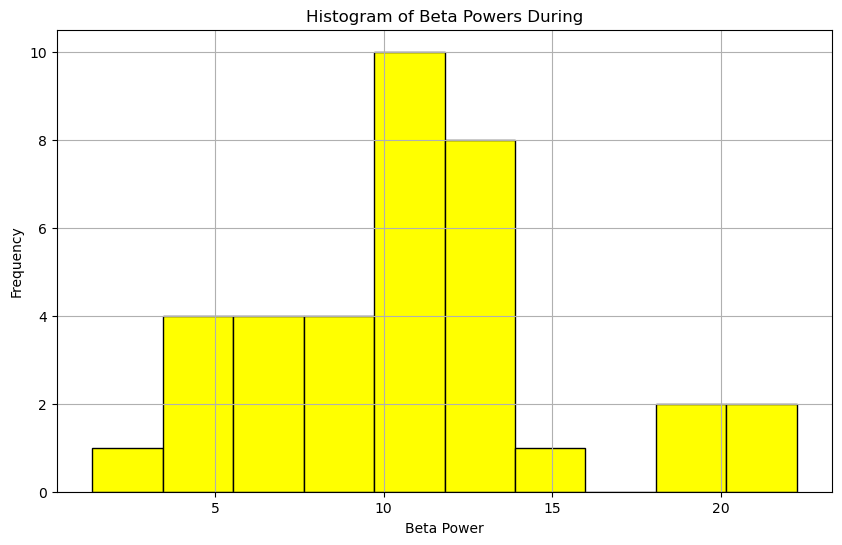

In [45]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

beta_df = during_df[during_df['Band'] == 'beta']

# Extract the power during for the beta band
power_beta2 = beta_df['Power During']

# Shapiro-Wilk test
stat, p = shapiro(power_beta2)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_beta2, bins=10, color='yellow', edgecolor='black')  
plt.title('Histogram of Beta Powers During')
plt.xlabel('Beta Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The data do NOT follow a normal distribution: 1.09275628655111e-05


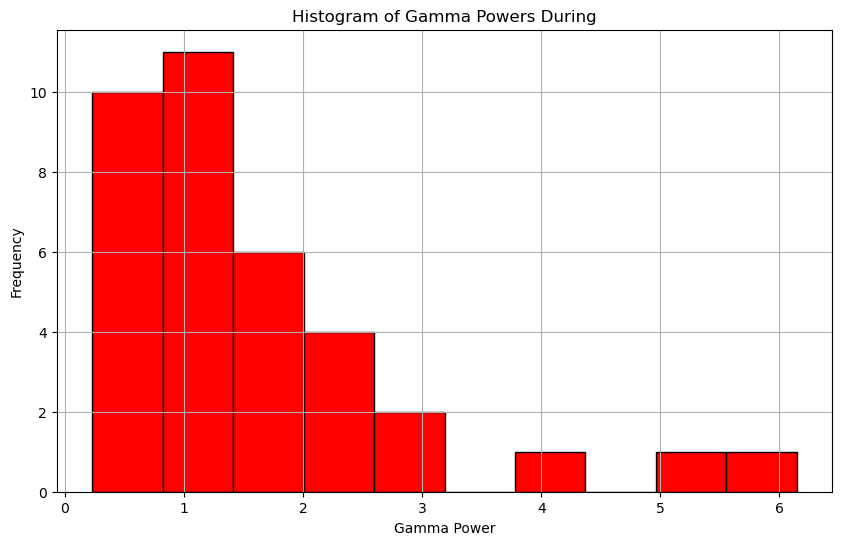

In [47]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

gamma_df = during_df[during_df['Band'] == 'gamma']

# Extract the power during for the gamma band
power_gamma2 = gamma_df['Power During']

# Shapiro-Wilk test
stat, p = shapiro(power_gamma2)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_gamma2, bins=10, color='red', edgecolor='black')  
plt.title('Histogram of Gamma Powers During')
plt.xlabel('Gamma Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Paired t-test 

Since this method can only be used if the data follows a normal distribution, it is applied only to delta, theta and alpha bands.

In [50]:
import numpy as np
from scipy.stats import ttest_rel


bands = [
    ("Delta", power_delta1, power_delta2),
    ("Theta", power_theta1, power_theta2),
    ("Alpha", power_alpha1, power_alpha2),
]

for name, group_before, group_during in bands:
    stat, p = ttest_rel(group_before, group_during)
    print(f"\nFor {name} band:")
    print(f"Stat t: {stat}, p-value: {p}")
    if p < 0.05:
        print("There is a significant difference between the groups.")
    else:
        print("There is NO sufficient evidence of a significant difference.")


For Delta band:
Stat t: -3.251175363424236, p-value: 0.0025441555121859063
There is a significant difference between the groups.

For Theta band:
Stat t: 0.7792814063800015, p-value: 0.44105160531393794
There is NO sufficient evidence of a significant difference.

For Alpha band:
Stat t: 3.2804489637739698, p-value: 0.0023509396868888204
There is a significant difference between the groups.


# Wilcoxon signed rank test

It is only applied to beta and gamma bands because they do not follow a normal distribution.

In [53]:
import numpy as np
from scipy.stats import wilcoxon


bands = [
    ("Beta", power_beta1, power_beta2),
    ("Gamma", power_gamma1, power_gamma2),
]

for name, group_before, group_during in bands:
    stat, p = wilcoxon(group_before, group_during)
    print(f"\nFor {name} band:")
    print(f"Stat: {stat:.4f}, p-value: {p}")
    if p < 0.05:
        print("There is a significant difference between the groups.")
    else:
        print("There is NO sufficient evidence of a significant difference.")
        


For Beta band:
Stat: 175.0000, p-value: 0.012085462658433244
There is a significant difference between the groups.

For Gamma band:
Stat: 78.0000, p-value: 1.763927866704762e-05
There is a significant difference between the groups.


# Box plots

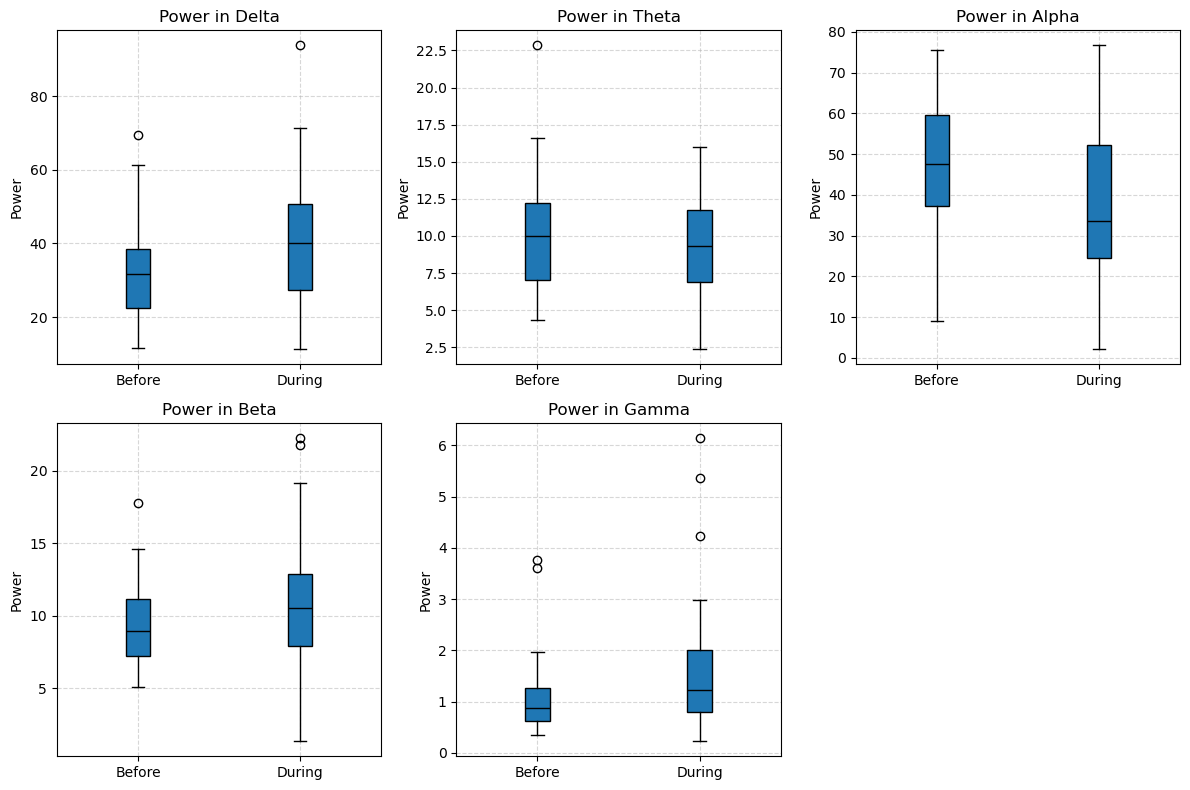

In [55]:
import matplotlib.pyplot as plt

bands = [
    ("Delta", power_delta1, power_delta2),
    ("Theta", power_theta1, power_theta2),
    ("Alpha", power_alpha1, power_alpha2),
    ("Beta", power_beta1, power_beta2),
    ("Gamma", power_gamma1, power_gamma2),
]

# Create the boxplots for each band
plt.figure(figsize=(12, 8))  
for i, (name, group_before, group_during) in enumerate(bands, 1):
    plt.subplot(2, 3, i)  
    
    # Create the boxplot for the two groups (before and during)    
    plt.boxplot([group_before, group_during], labels=["Before", "During"], patch_artist=True, medianprops={"color": "black"})
    
   
    plt.title(f"Power in {name}")
    plt.ylabel("Power")
    plt.grid(True, linestyle="--", alpha=0.5)


plt.tight_layout()
plt.savefig("boxplots_power.png", dpi=300)  # Guardar la figura
plt.show()

# Power Before and Power During in O1 channel

In [166]:
import pandas as pd

# Empty list to store all records
list_before = []
list_during = []


# Convert powers_before to a list of dictionaries
for patient_idx, channels in powers_before.items():
    for band, power in channels[14].items():          # The 14th position in the channel list corresponds to O1 channel
        list_before.append({
            'Patient': patient_idx + 1,
            'Channel': f'EEG O1',
            'Band': band,
            'Power Before': power,
        })

# Convert powers_during to a list of dictionaries
for patient_idx, channels in powers_during.items():
    for band, power in channels[14].items():          # The 14th position in the channel list corresponds to O1 channel
        list_during.append({
            'Patient': patient_idx + 1,
            'Channel': f'EEG O1',
            'Band': band,
            'Power During': power,
        })

# Convert to DataFrame 
before_df = pd.DataFrame(list_before)
during_df = pd.DataFrame(list_during)

# Histograms and Shapiro-Wilk test

# Power Before

The data follow a normal distribution: 0.15809612868653428


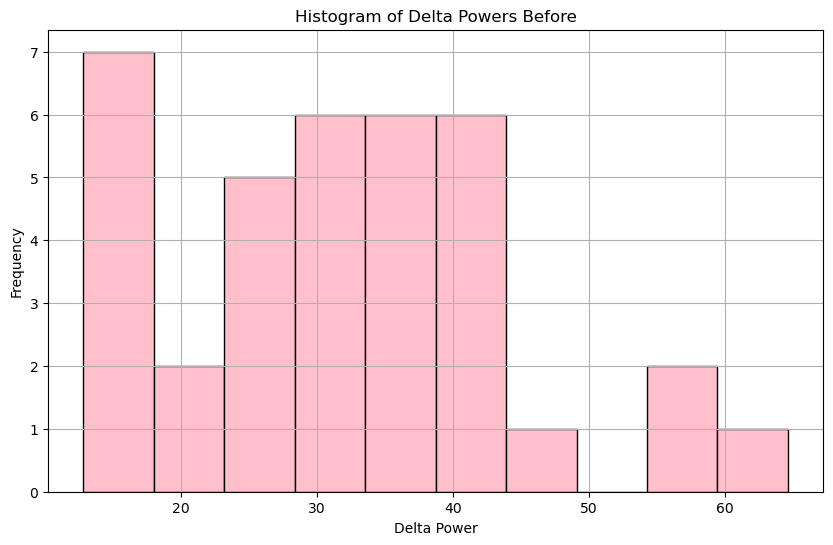

In [168]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro


delta_df = before_df[before_df['Band'] == 'delta']

# Extract the power before for the delta band
power_delta1 = delta_df['Power Before']

# Shapiro-Wilk test
stat, p = shapiro(power_delta1)
if p>0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)
    
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_delta1, bins=10, color='pink', edgecolor='black')  
plt.title('Histogram of Delta Powers Before')
plt.xlabel('Delta Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The data follow a normal distribution: 0.10662044477497329


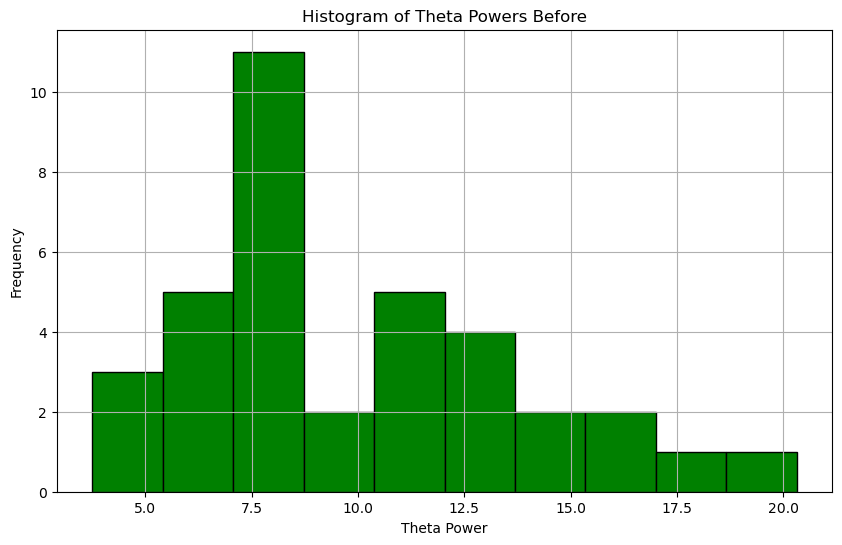

In [170]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

theta_df = before_df[before_df['Band'] == 'theta']

# Extract the power before for the theta band
power_theta1 = theta_df['Power Before']

# Shapiro-Wilk test
stat, p = shapiro(power_theta1)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_theta1, bins=10, color='green', edgecolor='black')  
plt.title('Histogram of Theta Powers Before')
plt.xlabel('Theta Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The data follow a normal distribution: 0.13606069103796342


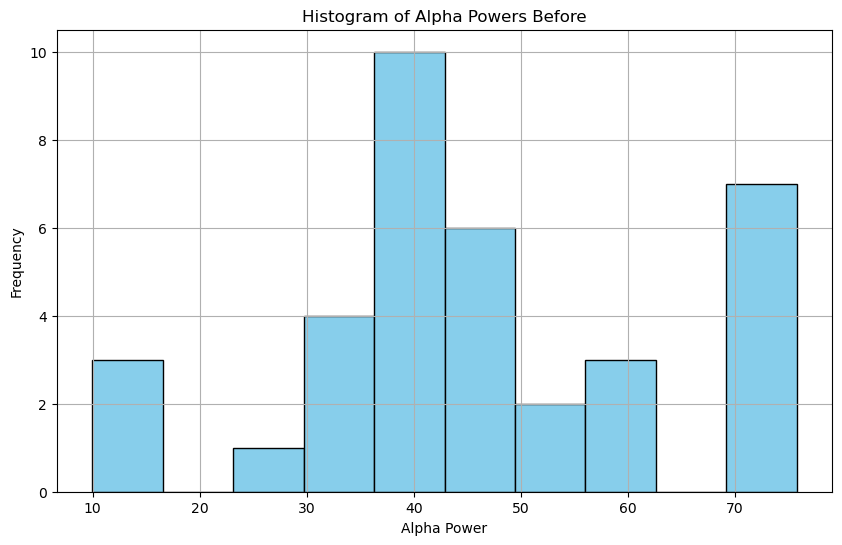

In [150]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

alpha_df = before_df[before_df['Band'] == 'alpha']

# Extract the power before for the alpha band
power_alpha1 = alpha_df['Power Before']

# Shapiro-Wilk test
stat, p = shapiro(power_alpha1)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_alpha1, bins=10, color='skyblue', edgecolor='black')  
plt.title('Histogram of Alpha Powers Before')
plt.xlabel('Alpha Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The data do NOT follow a normal distribution: 0.005344076158973675


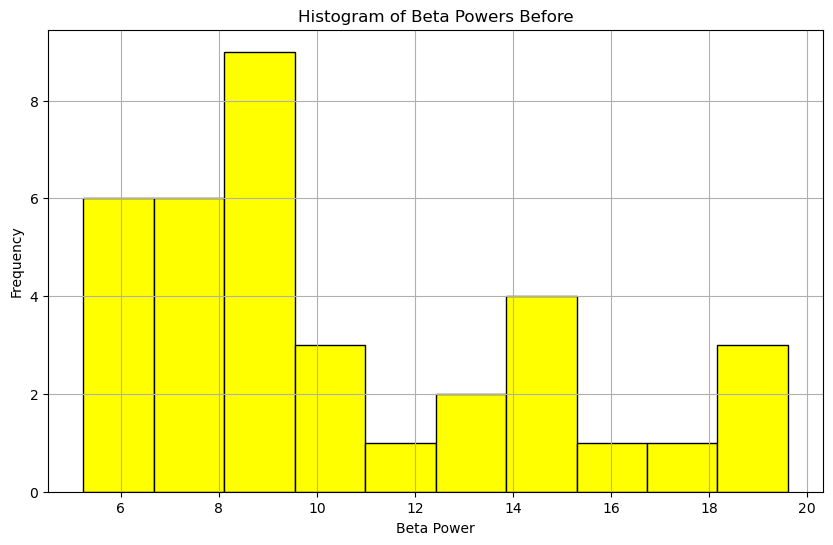

In [152]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

beta_df = before_df[before_df['Band'] == 'beta']

# Extract the power before for the beta band
power_beta1 = beta_df['Power Before']

# Shapiro-Wilk test
stat, p = shapiro(power_beta1)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_beta1, bins=10, color='yellow', edgecolor='black')  
plt.title('Histogram of Beta Powers Before')
plt.xlabel('Beta Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The data do NOT follow a normal distribution: 1.115013717503904e-07


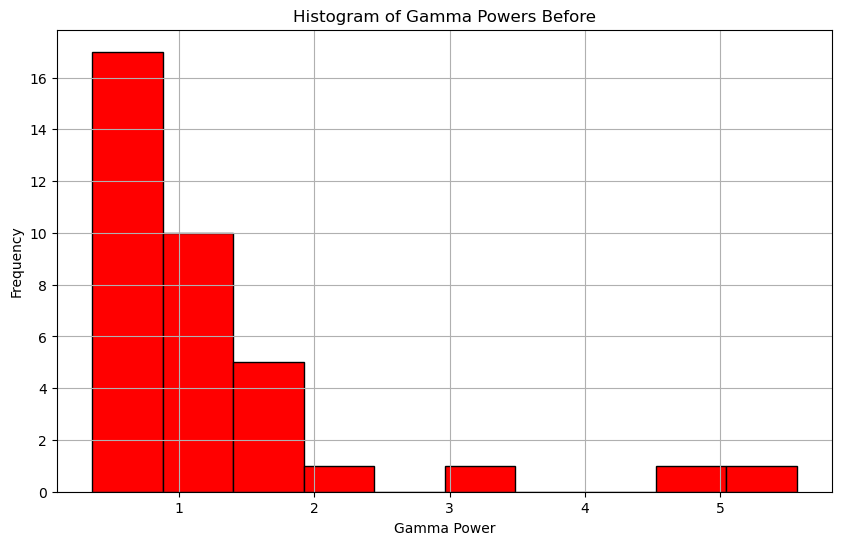

In [154]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

gamma_df = before_df[before_df['Band'] == 'gamma']

# Extract the power before for the gamma band
power_gamma1 = gamma_df['Power Before']

# Shapiro-Wilk test
stat, p = shapiro(power_gamma1)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_gamma1, bins=10, color='red', edgecolor='black')  
plt.title('Histogram of Gamma Powers Before')
plt.xlabel('Gamma Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Power During

The data follow a normal distribution: 0.61988799140586


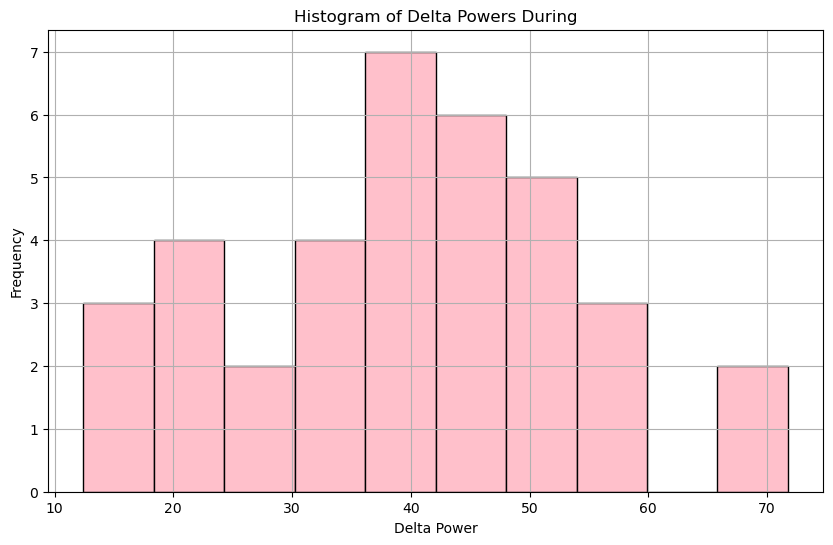

In [174]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

delta_df = during_df[during_df['Band'] == 'delta']

# Extract the power during for the delta band
power_delta2 = delta_df['Power During']

# Shapiro-Wilk test
stat, p = shapiro(power_delta2)
if p>0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)
    

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_delta2, bins=10, color='pink', edgecolor='black')  
plt.title('Histogram of Delta Powers During')
plt.xlabel('Delta Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The data follow a normal distribution: 0.05064055252498743


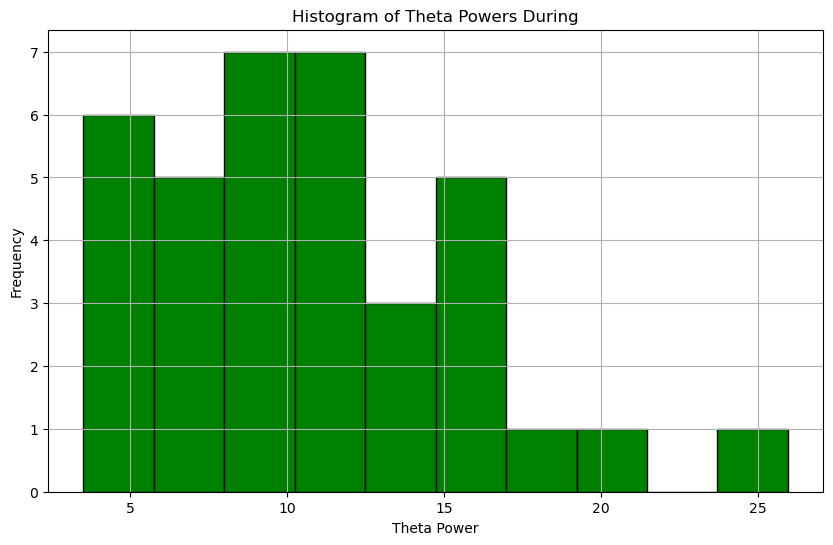

In [176]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

theta_df = during_df[during_df['Band'] == 'theta']

# Extract the power during for the theta band
power_theta2 = theta_df['Power During']

# Shapiro-Wilk test
stat, p = shapiro(power_theta2)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_theta2, bins=10, color='green', edgecolor='black')  
plt.title('Histogram of Theta Powers During')
plt.xlabel('Theta Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The data do NOT follow a normal distribution: 0.04835369551907426


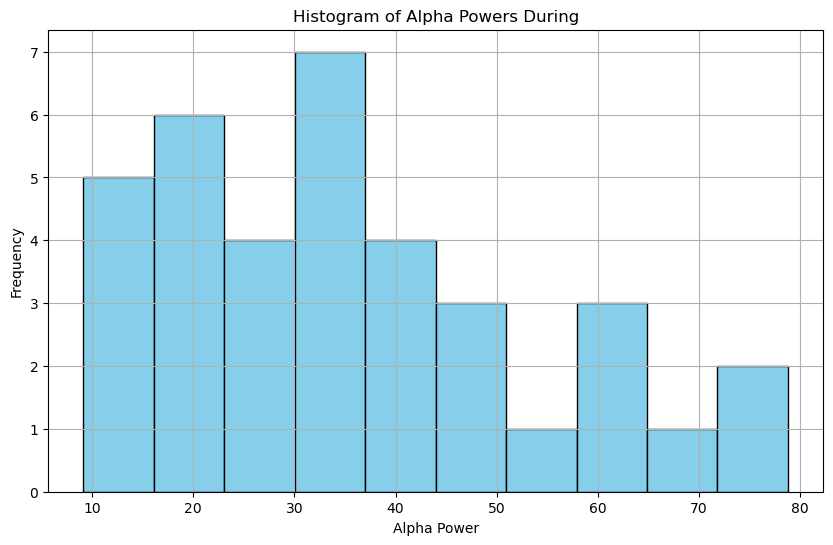

In [178]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

alpha_df = during_df[during_df['Band'] == 'alpha']

# Extract the power during for the alpha band
power_alpha2 = alpha_df['Power During']

# Shapiro-Wilk test
stat, p = shapiro(power_alpha2)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_alpha2, bins=10, color='skyblue', edgecolor='black')  
plt.title('Histogram of Alpha Powers During')
plt.xlabel('Alpha Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The data do NOT follow a normal distribution: 0.01779082932500801


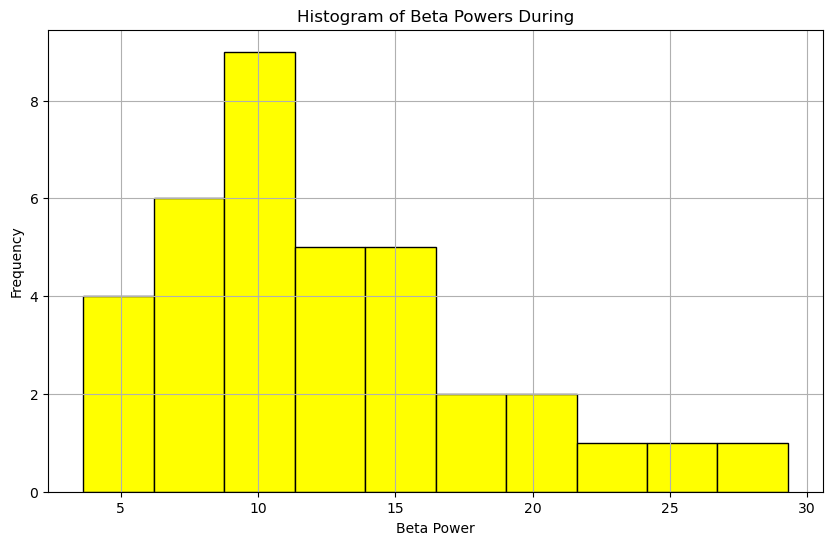

In [180]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

beta_df = during_df[during_df['Band'] == 'beta']

# Extract the power during for the beta band
power_beta2 = beta_df['Power During']

# Shapiro-Wilk test
stat, p = shapiro(power_beta2)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_beta2, bins=10, color='yellow', edgecolor='black')  
plt.title('Histogram of Beta Powers During')
plt.xlabel('Beta Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The data do NOT follow a normal distribution: 5.818219534923864e-08


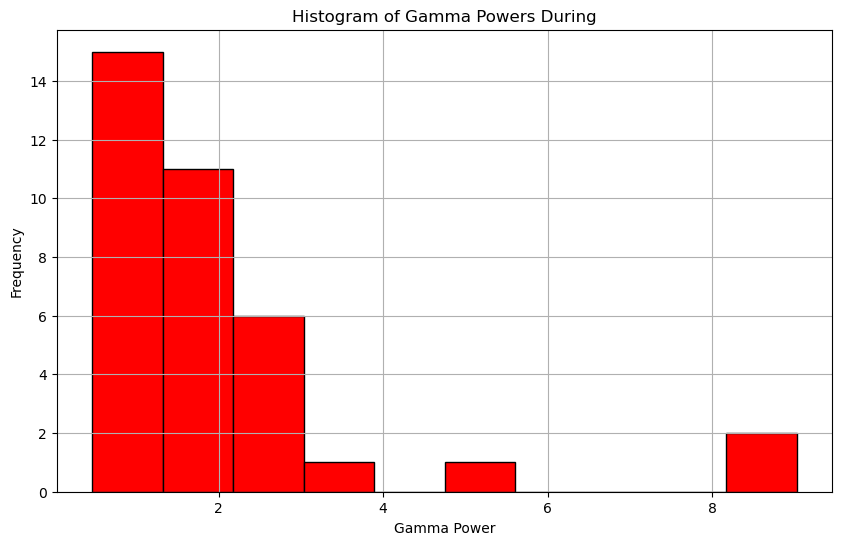

In [182]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

gamma_df = during_df[during_df['Band'] == 'gamma']

# Extract the power during for the gamma band
power_gamma2 = gamma_df['Power During']

# Shapiro-Wilk test
stat, p = shapiro(power_gamma2)
if p > 0.05:
    print("The data follow a normal distribution:", p)

else:
    print("The data do NOT follow a normal distribution:", p)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(power_gamma2, bins=10, color='red', edgecolor='black')  
plt.title('Histogram of Gamma Powers During')
plt.xlabel('Gamma Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Paired t-test

Since this method can only be used if the data follows a normal distribution, it is applied only to delta and theta bands.

In [192]:
import numpy as np
from scipy.stats import ttest_rel


bands = [
    ("Delta", power_delta1, power_delta2),
    ("Theta", power_theta1, power_theta2),
    
]

for name, group_before, group_during in bands:
    stat, p = ttest_rel(group_before, group_during)
    print(f"\nFor {name} band:")
    print(f"Stat t: {stat}, p-value: {p}")
    if p < 0.05:
        print("There is a significant difference between the groups.")
    else:
        print("There is NO sufficient evidence of a significant difference.")


For Delta band:
Stat t: -3.7635492193047058, p-value: 0.0006150673083600971
There is a significant difference between the groups.

For Theta band:
Stat t: -0.7323350356782774, p-value: 0.4688401658106446
There is NO sufficient evidence of a significant difference.


# Wilcoxon signed-rank test

It is only applied to alpha, beta and gamma bands because they do not follow a normal distribution.

In [201]:
import numpy as np
from scipy.stats import wilcoxon


bands = [
    ("Alpha", power_alpha1, power_alpha2),
    ("Beta", power_beta1, power_beta2),
    ("Gamma", power_gamma1, power_gamma2)
    
]

for name, group_before, group_during in bands:    
    stat, p = wilcoxon(group_before, group_during)
    print(f"\nFor {name} band:")
    print(f"Stat: {stat:.4f}, p-value: {p}")
    if p < 0.05:
        print("There is a significant difference between the groups.")
    else:
        print("There is NO sufficient evidence of a significant difference.")


For Alpha band:
Stat: 104.0000, p-value: 0.00015944891492836177
There is a significant difference between the groups.

For Beta band:
Stat: 186.0000, p-value: 0.02005367778474465
There is a significant difference between the groups.

For Gamma band:
Stat: 69.0000, p-value: 7.36583024263382e-06
There is a significant difference between the groups.


# Boxplots

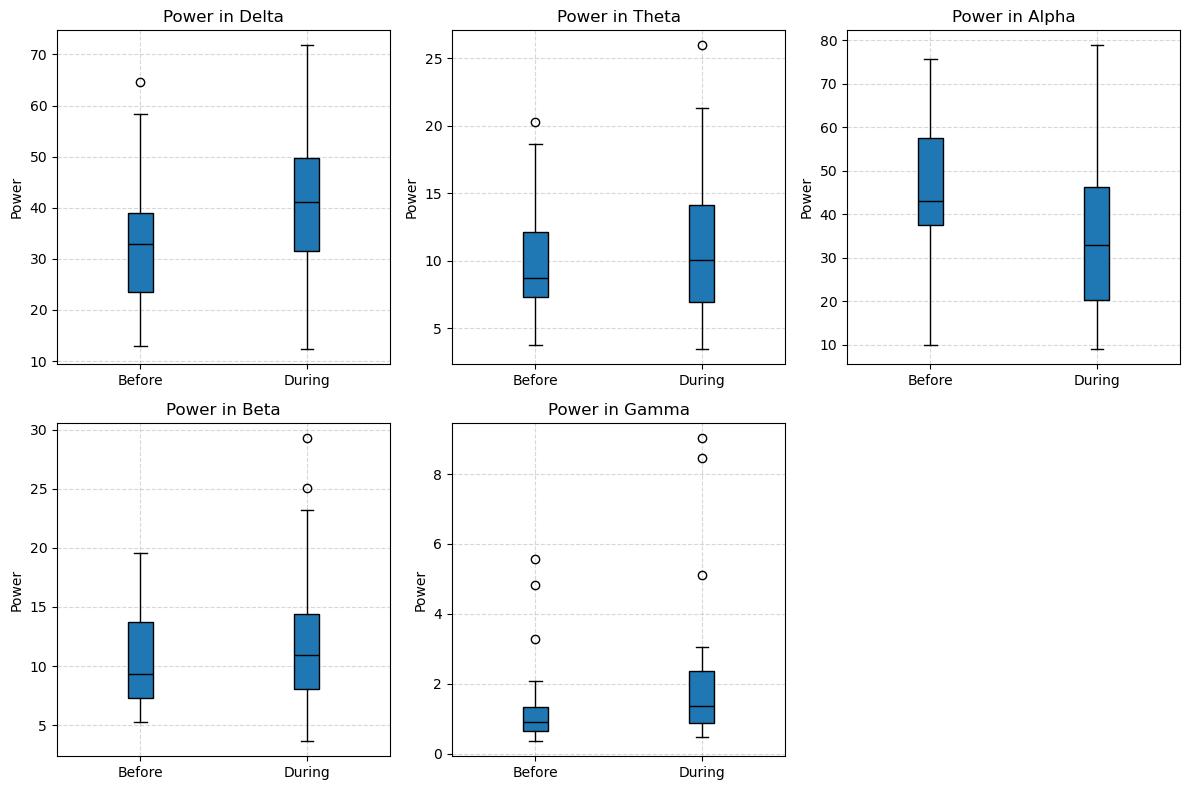

In [203]:
import matplotlib.pyplot as plt

bands = [
    ("Delta", power_delta1, power_delta2),
    ("Theta", power_theta1, power_theta2),
    ("Alpha", power_alpha1, power_alpha2),
    ("Beta", power_beta1, power_beta2),
    ("Gamma", power_gamma1, power_gamma2),
]

# Create the boxplots for each band
plt.figure(figsize=(12, 8))  
for i, (name, group_before, group_during) in enumerate(bands, 1):
    plt.subplot(2, 3, i)  
    
    # Create the boxplot for the two groups (before and during)    
    plt.boxplot([group_before, group_during], labels=["Before", "During"], patch_artist=True, medianprops={"color": "black"})
    
   
    plt.title(f"Power in {name}")
    plt.ylabel("Power")
    plt.grid(True, linestyle="--", alpha=0.5)


plt.tight_layout()
plt.show()